In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# Define the model class
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.sigmoid(self.output(x))
        return x

# Load and process Wine dataset
data = load_wine()
X_full, y = data.data, data.target
X = X_full[:, :10]  # Use only the first 10 features

# Convert to binary classification (class 0 vs. others)
y = (y == 0).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors and data loaders
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Instantiate model, criterion, optimizer
model = ANNModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----- Model summary table -----
layers = [
    {"Layer (type)": "Input", "Output Shape": "(None, 10)", "Param #": 0},
    {"Layer (type)": "fc1 (Linear)", "Output Shape": "(None, 64)", "Param #": sum(p.numel() for p in model.fc1.parameters())},
    {"Layer (type)": "fc2 (Linear)", "Output Shape": "(None, 32)", "Param #": sum(p.numel() for p in model.fc2.parameters())},
    {"Layer (type)": "fc3 (Linear)", "Output Shape": "(None, 16)", "Param #": sum(p.numel() for p in model.fc3.parameters())},
    {"Layer (type)": "output (Linear)", "Output Shape": "(None, 1)", "Param #": sum(p.numel() for p in model.output.parameters())},
]
table = pd.DataFrame(layers)
print(table.to_markdown(index=False))

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params

print(f"\nTotal params: {total_params}")
print(f"Trainable params: {trainable_params}")
print(f"Non-trainable params: {non_trainable_params}")

# ----- Training -----
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1:02d}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("Training complete.")


ModuleNotFoundError: No module named 'torch'

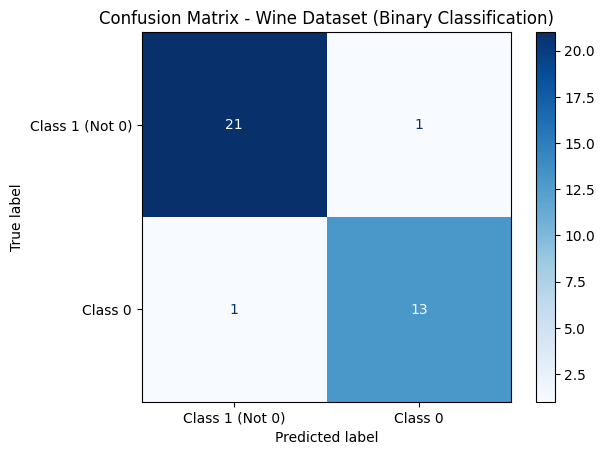

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set model to evaluation mode
model.eval()

# Run inference on the test set
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    outputs = model(X_test_tensor)
    preds = (outputs >= 0.5).int().squeeze().numpy()
    labels = y_test.flatten()  # y_test is still a NumPy array

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 1 (Not 0)", "Class 0"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Wine Dataset (Binary Classification)")
plt.show()


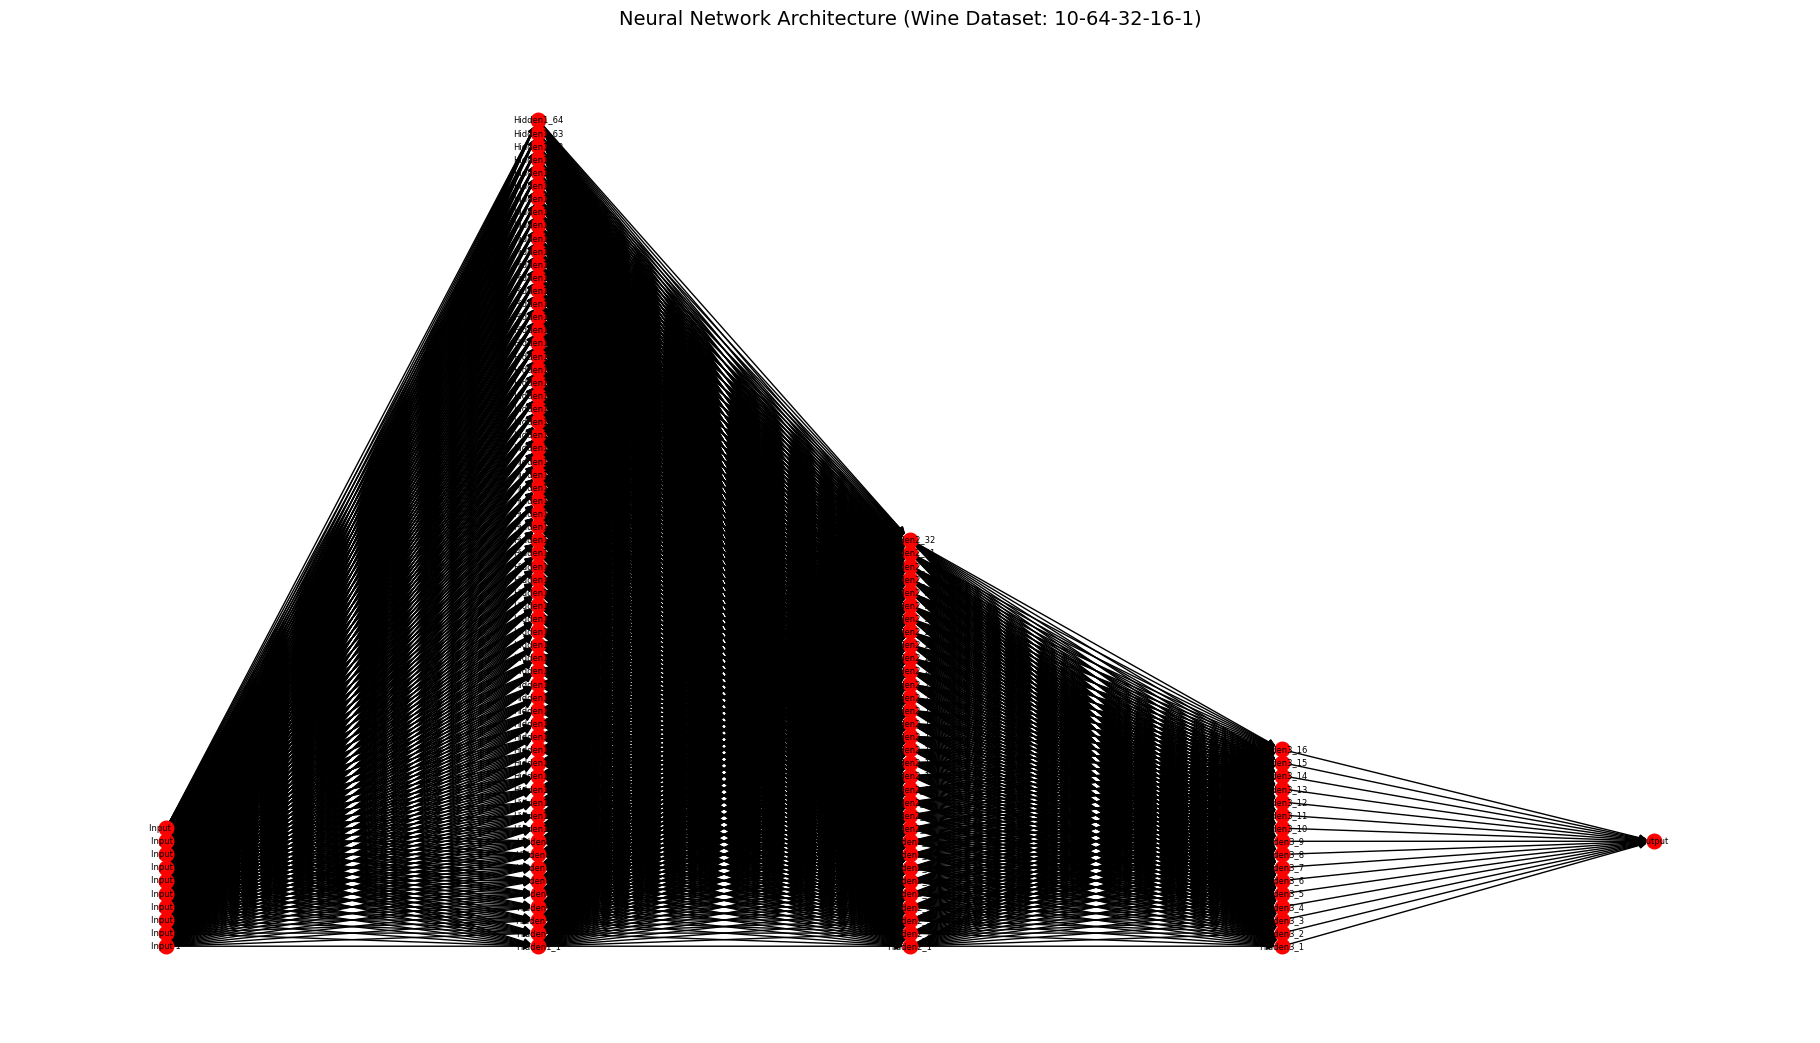

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define nodes for Wine dataset with 10 input features
input_nodes = [f'Input {i+1}' for i in range(10)]  # 10 features from Wine dataset
hidden1_nodes = [f'Hidden1_{i+1}' for i in range(64)]
hidden2_nodes = [f'Hidden2_{i+1}' for i in range(32)]
hidden3_nodes = [f'Hidden3_{i+1}' for i in range(16)]
output_node = ['Output']  # Binary classification: class 0 vs others

# Create directed graph
G = nx.DiGraph()

# Add all nodes to the graph
G.add_nodes_from(input_nodes)
G.add_nodes_from(hidden1_nodes)
G.add_nodes_from(hidden2_nodes)
G.add_nodes_from(hidden3_nodes)
G.add_nodes_from(output_node)

# Connect each layer fully to the next
for i in input_nodes:
    for h in hidden1_nodes:
        G.add_edge(i, h)
for h1 in hidden1_nodes:
    for h2 in hidden2_nodes:
        G.add_edge(h1, h2)
for h2 in hidden2_nodes:
    for h3 in hidden3_nodes:
        G.add_edge(h2, h3)
for h3 in hidden3_nodes:
    G.add_edge(h3, output_node[0])

# Define layout for visualization: layers spaced horizontally
pos = {}
pos.update({node: (0, idx) for idx, node in enumerate(input_nodes)})
pos.update({node: (1, idx) for idx, node in enumerate(hidden1_nodes)})
pos.update({node: (2, idx) for idx, node in enumerate(hidden2_nodes)})
pos.update({node: (3, idx) for idx, node in enumerate(hidden3_nodes)})
pos.update({node: (4, 8) for node in output_node})  # place output in middle vertically

# Draw the network
plt.figure(figsize=(18, 10))
nx.draw(G, pos, with_labels=True, node_size=110, node_color='red', font_size=6, arrowsize=10)
plt.title('Neural Network Architecture (Wine Dataset: 10-64-32-16-1)', fontsize=14)
plt.axis('off')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# ----- Define the model class with single hidden layer -----
class ANNModelSingleHidden(nn.Module):
    def __init__(self):
        super(ANNModelSingleHidden, self).__init__()
        self.fc1 = nn.Linear(10, 64)  # Single hidden layer
        self.output = nn.Linear(64, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.sigmoid(self.output(x))
        return x

# ----- Load and process Wine dataset -----
data = load_wine()
X_full, y = data.data, data.target

# Convert to binary classification: class 0 vs rest
y = (y == 0).astype(int)

# Use only the first 10 features
X = X_full[:, :10]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors and DataLoader
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# ----- Model, loss function, optimizer -----
model = ANNModelSingleHidden()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----- Model Summary Table -----
layers = [
    {"Layer (type)": "Input", "Output Shape": "(None, 10)", "Param #": 0},
    {"Layer (type)": "fc1 (Linear)", "Output Shape": "(None, 64)", "Param #": sum(p.numel() for p in model.fc1.parameters())},
    {"Layer (type)": "output (Linear)", "Output Shape": "(None, 1)", "Param #": sum(p.numel() for p in model.output.parameters())},
]
table = pd.DataFrame(layers)
print(table.to_markdown(index=False))

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params

print(f"\nTotal params: {total_params}")
print(f"Trainable params: {trainable_params}")
print(f"Non-trainable params: {non_trainable_params}")

# ----- Training Loop -----
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1:02d}/{num_epochs}], Loss: {epoch_loss:.4f}")
print("Training complete.")


| Layer (type)    | Output Shape   |   Param # |
|:----------------|:---------------|----------:|
| Input           | (None, 10)     |         0 |
| fc1 (Linear)    | (None, 64)     |       704 |
| output (Linear) | (None, 1)      |        65 |

Total params: 769
Trainable params: 769
Non-trainable params: 0
Epoch [01/10], Loss: 0.6485
Epoch [02/10], Loss: 0.6172
Epoch [03/10], Loss: 0.5883
Epoch [04/10], Loss: 0.5594
Epoch [05/10], Loss: 0.5332
Epoch [06/10], Loss: 0.5060
Epoch [07/10], Loss: 0.4808
Epoch [08/10], Loss: 0.4563
Epoch [09/10], Loss: 0.4321
Epoch [10/10], Loss: 0.4094
Training complete.


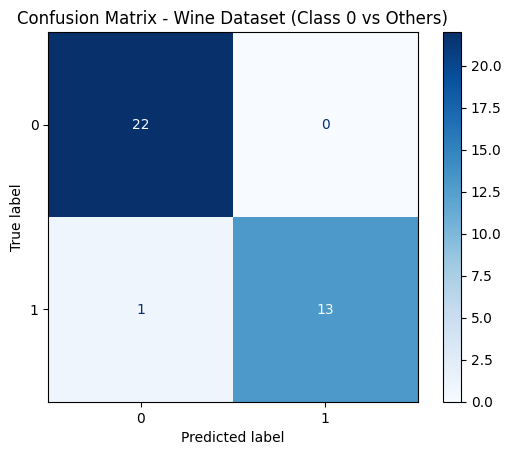

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare test data tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int32)  # Integer labels for confusion matrix

# Set model to evaluation mode
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    preds = (outputs >= 0.5).int().squeeze()  # Binary predictions (0 or 1)
    true_labels = y_test_tensor

# Compute confusion matrix
cm = confusion_matrix(true_labels, preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Wine Dataset (Class 0 vs Others)")
plt.show()


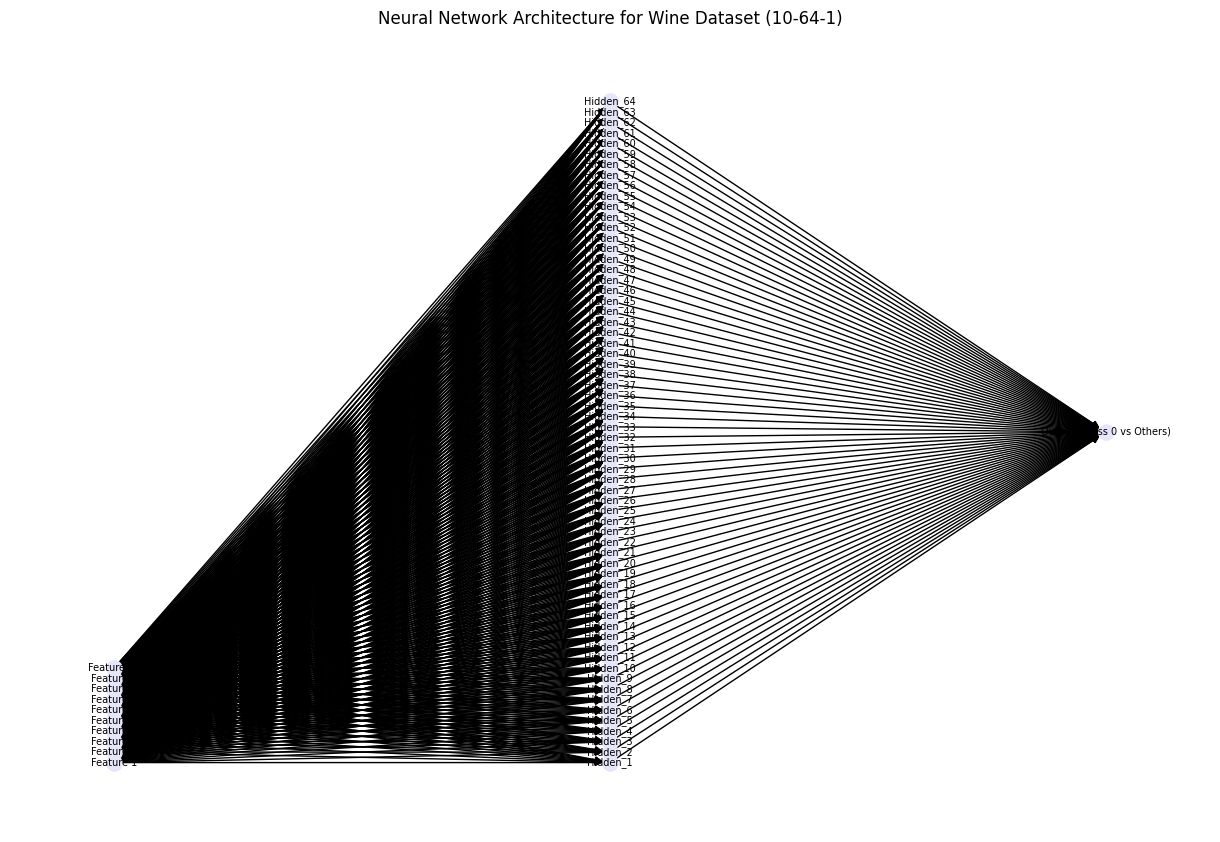

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define architecture based on Wine dataset (using first 10 features)
input_nodes = [f'Feature {i+1}' for i in range(10)]
hidden_nodes = [f'Hidden_{i+1}' for i in range(64)]
output_nodes = ['Output (Class 0 vs Others)']

G = nx.DiGraph()

# Add nodes to graph
G.add_nodes_from(input_nodes)
G.add_nodes_from(hidden_nodes)
G.add_nodes_from(output_nodes)

# Connect input layer to hidden layer
for i in input_nodes:
    for h in hidden_nodes:
        G.add_edge(i, h)

# Connect hidden layer to output layer
for h in hidden_nodes:
    G.add_edge(h, output_nodes[0])

# Position nodes
pos = {}
pos.update({node: (0, idx) for idx, node in enumerate(input_nodes)})        # Input layer
pos.update({node: (1, idx) for idx, node in enumerate(hidden_nodes)})       # Hidden layer
pos.update({node: (2, 31.5) for node in output_nodes})                      # Output node centered

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=120, node_color='lavender', font_size=7, arrowsize=10)
plt.title('Neural Network Architecture for Wine Dataset (10-64-1)')
plt.axis('off')
plt.show()
